In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import stopwords

# Dataset 1

In [3]:
training_set = pd.read_csv("../dataset/labeledTrainData.tsv",sep='\t')
Y=training_set['sentiment'].values
X=training_set['review'].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)
print ("No. of Training Examples: ",x_train.shape)
print ("No. of Testing Examples: ",x_test.shape)

No. of Training Examples:  (20000,)
No. of Testing Examples:  (5000,)


In [4]:
tf=TfidfVectorizer(max_features=2500,min_df=10,max_df=0.95,stop_words=stopwords.words('english'))

tf.fit_transform(x_train)
X_train=tf.transform(x_train) # for train data we can use fit_transfrom also.
X_test=tf.transform(x_test)
pickle.dump(tf, open('vectorizer.sav', 'wb'))

In [5]:
# Evaluating models peformance based on precision, recall and accuracy
def do_evaluation (predicted, actual, pos_label=0, verbose=True):
    precision = precision_score(actual,predicted,pos_label=pos_label)
    recall = recall_score(actual,predicted,pos_label=pos_label)
    accuracy = accuracy_score(actual,predicted)
    f1score = f1_score(predicted,actual)

    if verbose:
        print('"Positive' if pos_label==1 else '"Negative','Evaluation"','| Precision ==',round(precision*100,2),'| Recall ==',round(recall*100,2),'| Accuracy ==',round(accuracy*100,2),'| F1 score ==',round(f1score*100,2))

# Training phase..

In [6]:
# Random Foreset Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pickle.dump(knn, open('knn.sav', 'wb'))
# Testing phase
knn_pred=knn.predict(X_test)
print("Accuracy: ",round(accuracy_score(y_test,knn_pred),3))
print ('{:.1%} of prediction are positive'.format(float(sum(knn_pred))/len(y_test)))
print ('{:.1%} are actually positive'.format(float(sum(y_test))/len(y_test)))
do_evaluation (knn_pred,y_test, pos_label= 1, verbose=True)
do_evaluation (knn_pred,y_test, pos_label= 0, verbose=True)

Accuracy:  0.73
49.6% of prediction are positive
50.0% are actually positive
"Positive Evaluation" | Precision == 73.13 | Recall == 72.6 | Accuracy == 72.96 | F1 score == 72.86
"Negative Evaluation" | Precision == 72.8 | Recall == 73.32 | Accuracy == 72.96 | F1 score == 72.86


# E valuate classifier performance(roc and auc curve)

In [7]:
def display_curve(nb_pred,name):
    #Calculating False Positive Rate ,True Positive Rate and threshold
    fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_pred)
    #AUC is the percentage of the ROC plot that is underneath the curve:
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    plt.title(f'Operating Characteristic for {name} Classifier')
    plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

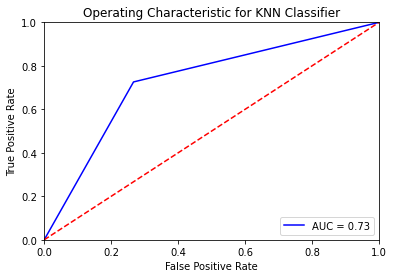

In [8]:
# Gaussian Naive Bayes Classifier
display_curve(knn_pred,'KNN')

# Testing

In [9]:
# Load model
knn = pickle.load(open('knn.sav','rb'))
tf = pickle.load(open('vectorizer.sav','rb'))

# Testing
test_array = ['love','good','fine','bad','worst']
test_func = lambda x: 'pos' if x==1 else 'neg'
knn_c = knn.predict(tf.transform(test_array).toarray())

for sentence,l in zip(test_array,knn_c):
    print(sentence,': Random Forest=',test_func(l))


love : Random Forest= pos
good : Random Forest= pos
fine : Random Forest= pos
bad : Random Forest= neg
worst : Random Forest= neg
